In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\gamze bozkurt
[nltk_data]     omar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [5]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [7]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [9]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

# Define the start and end dates
start_date = '2008-01-01'
end_date = '2012-12-31'

# Create a new dataframe by filtering the original dataframe
df_uk_2008_2012 = df_uk_full[(df_uk_full['Date'] >= start_date) & (df_uk_full['Date'] <= end_date)].copy()

#Check if the data types are right 
df_uk_2008_2012.dtypes


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_25544\4037234991.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

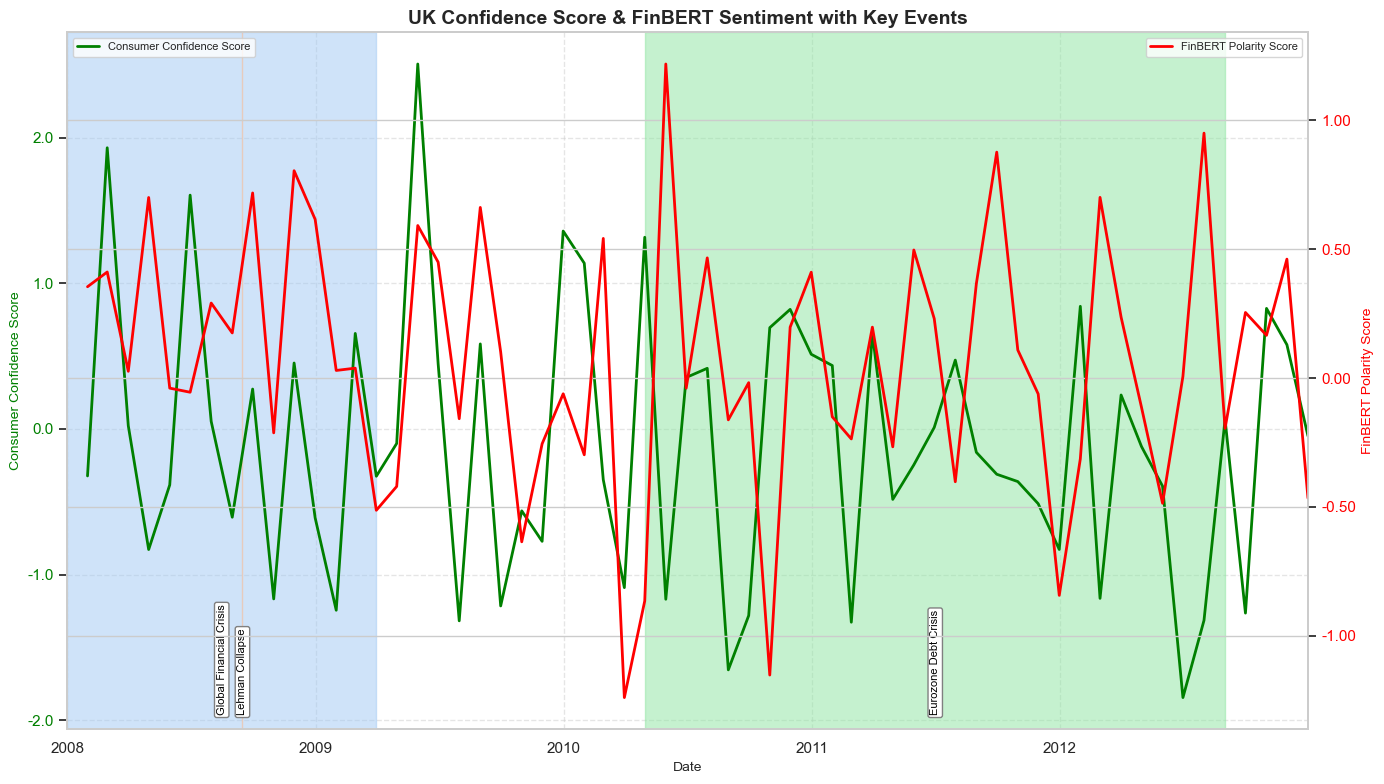

In [197]:
# Sample data (replace with your real dataset)
start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
#date_range = pd.date_range(start='2008-01-01', end='2012-12-31', freq='M')
df_uk_2008_2012 = pd.DataFrame({
    'Date': date_range,
    'confidence_score': np.random.normal(loc=0, scale=1, size=len(date_range)),
    'polarity_score_finbert': np.random.normal(loc=0, scale=0.5, size=len(date_range))
})

# Filter for 2008–2012
start_date = pd.to_datetime('2008-01-01')
end_date = pd.to_datetime('2012-12-31')
df_plot = df_uk_2008_2012[
    (df_uk_2008_2012['Date'] >= start_date) & (df_uk_2008_2012['Date'] <= end_date)
].copy()
df_plot = df_plot.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Key events
events = {
    'Global Financial Crisis': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
}

# Plot setup
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot confidence score (green)
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Consumer Confidence Score', color='green', fontsize=10)
ax1.plot(df_plot['Date'], df_plot['confidence_score'], color='green',
         label='Consumer Confidence Score', linewidth=2, markersize=4)
ax1.tick_params(axis='y', labelcolor='green')

# Plot sentiment score (red)
ax2 = ax1.twinx()
ax2.set_ylabel('FinBERT Polarity Score', color='red', fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color='red',
         label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor='red')

# Event shading and internal labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
for i, (event_name, dates) in enumerate(events.items()):
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])
    if end < start_date:
        continue
    display_start = max(start, start_date)
    display_end = min(end, end_date)
    ax1.axvspan(display_start, display_end, color=event_colors[i % len(event_colors)], alpha=0.5)

    label_x = display_start + (display_end - display_start) / 2
    ax1.text(label_x, 0.02, event_name, rotation=90, fontsize=8, color='black',
             ha='center', va='bottom', transform=ax1.get_xaxis_transform(),
             bbox=dict(facecolor='white', alpha=1, edgecolor='gray', boxstyle='round,pad=0.2'))

# Title and layout
plt.title('UK Confidence Score & FinBERT Sentiment with Key Events', fontsize=14, fontweight='bold')
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Set axis limits
ax1.set_xlim(start_date, end_date)
#ax1.set_ylim(df_plot['confidence_score'].min() - 1, df_plot['confidence_score'].max() + 1)
ax1.set_xlim(start_date, df_plot['Date'].max())
# Grid, legends, and show
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

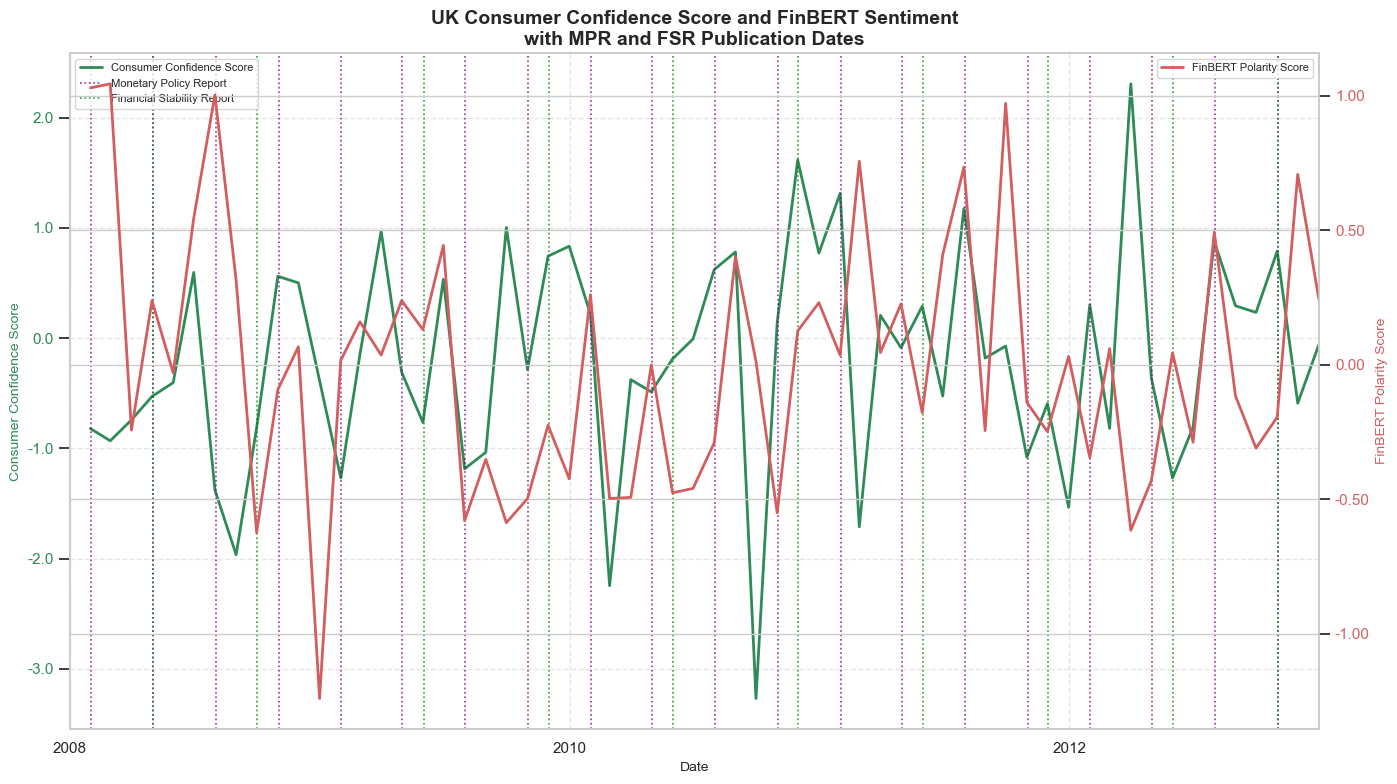

In [195]:
start_date = pd.to_datetime('2008-01-01')
df_plot2 = df_uk_2008_2012[df_uk_2008_2012['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['confidence_score', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#2E8B57'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Consumer Confidence Score', color=color_conf, fontsize=10)
ax1.plot(df_plot2['Date'], df_plot2['confidence_score'], color=color_conf, label='Consumer Confidence Score', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_conf, size=8)

# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Consumer Confidence Score and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
#ax1.set_ylim(df_plot['confidence_score'].min() - 1, df_plot['confidence_score'].max() + 1)
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

#### Drop unncessary columns to reduce the number of variables to be explored

In [19]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_2008_2012.drop(['ftse_250_price', 'ftse_350_Price','ftse_350_Total Return (Gross, Unhedged)','price_02_Price', 'price_05_Price','price_05_Total Return (Gross, Unhedged)','price_10_Price','price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [21]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [23]:
# Define the new order of the columns
new_column_order = [
    'Date', 'confidence_score', 'finbert_sentiment_score', 'CPI_pct_change',
     'unemployment_rate','wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reindex the DataFrame with the new column order
df_uk_focused = df_uk_focused[new_column_order]

df_uk_focused.head()

,Date,confidence_score,finbert_sentiment_score,CPI_pct_change,unemployment_rate,wage_growth_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
218,2008-01-01,-13.0,-0.007201,2.2,5.2,3.8,0.5,5488.98,5.375000,162.975
219,2008-02-01,-17.0,0.045560,2.5,5.2,3.6,0.5,5594.87,5.250000,163.862
220,2008-03-01,-19.0,0.175849,2.5,5.3,4.1,-0.5,5581.66,5.125000,164.798
221,2008-04-01,-24.0,0.175849,3.0,5.2,4.6,-0.5,5679.93,5.000000,164.468
222,2008-05-01,-29.0,-0.010290,3.3,5.4,4.7,-0.5,5657.73,4.916667,164.014


### Corraletion Analysis

#### Create pairplot for visual correlation analysis

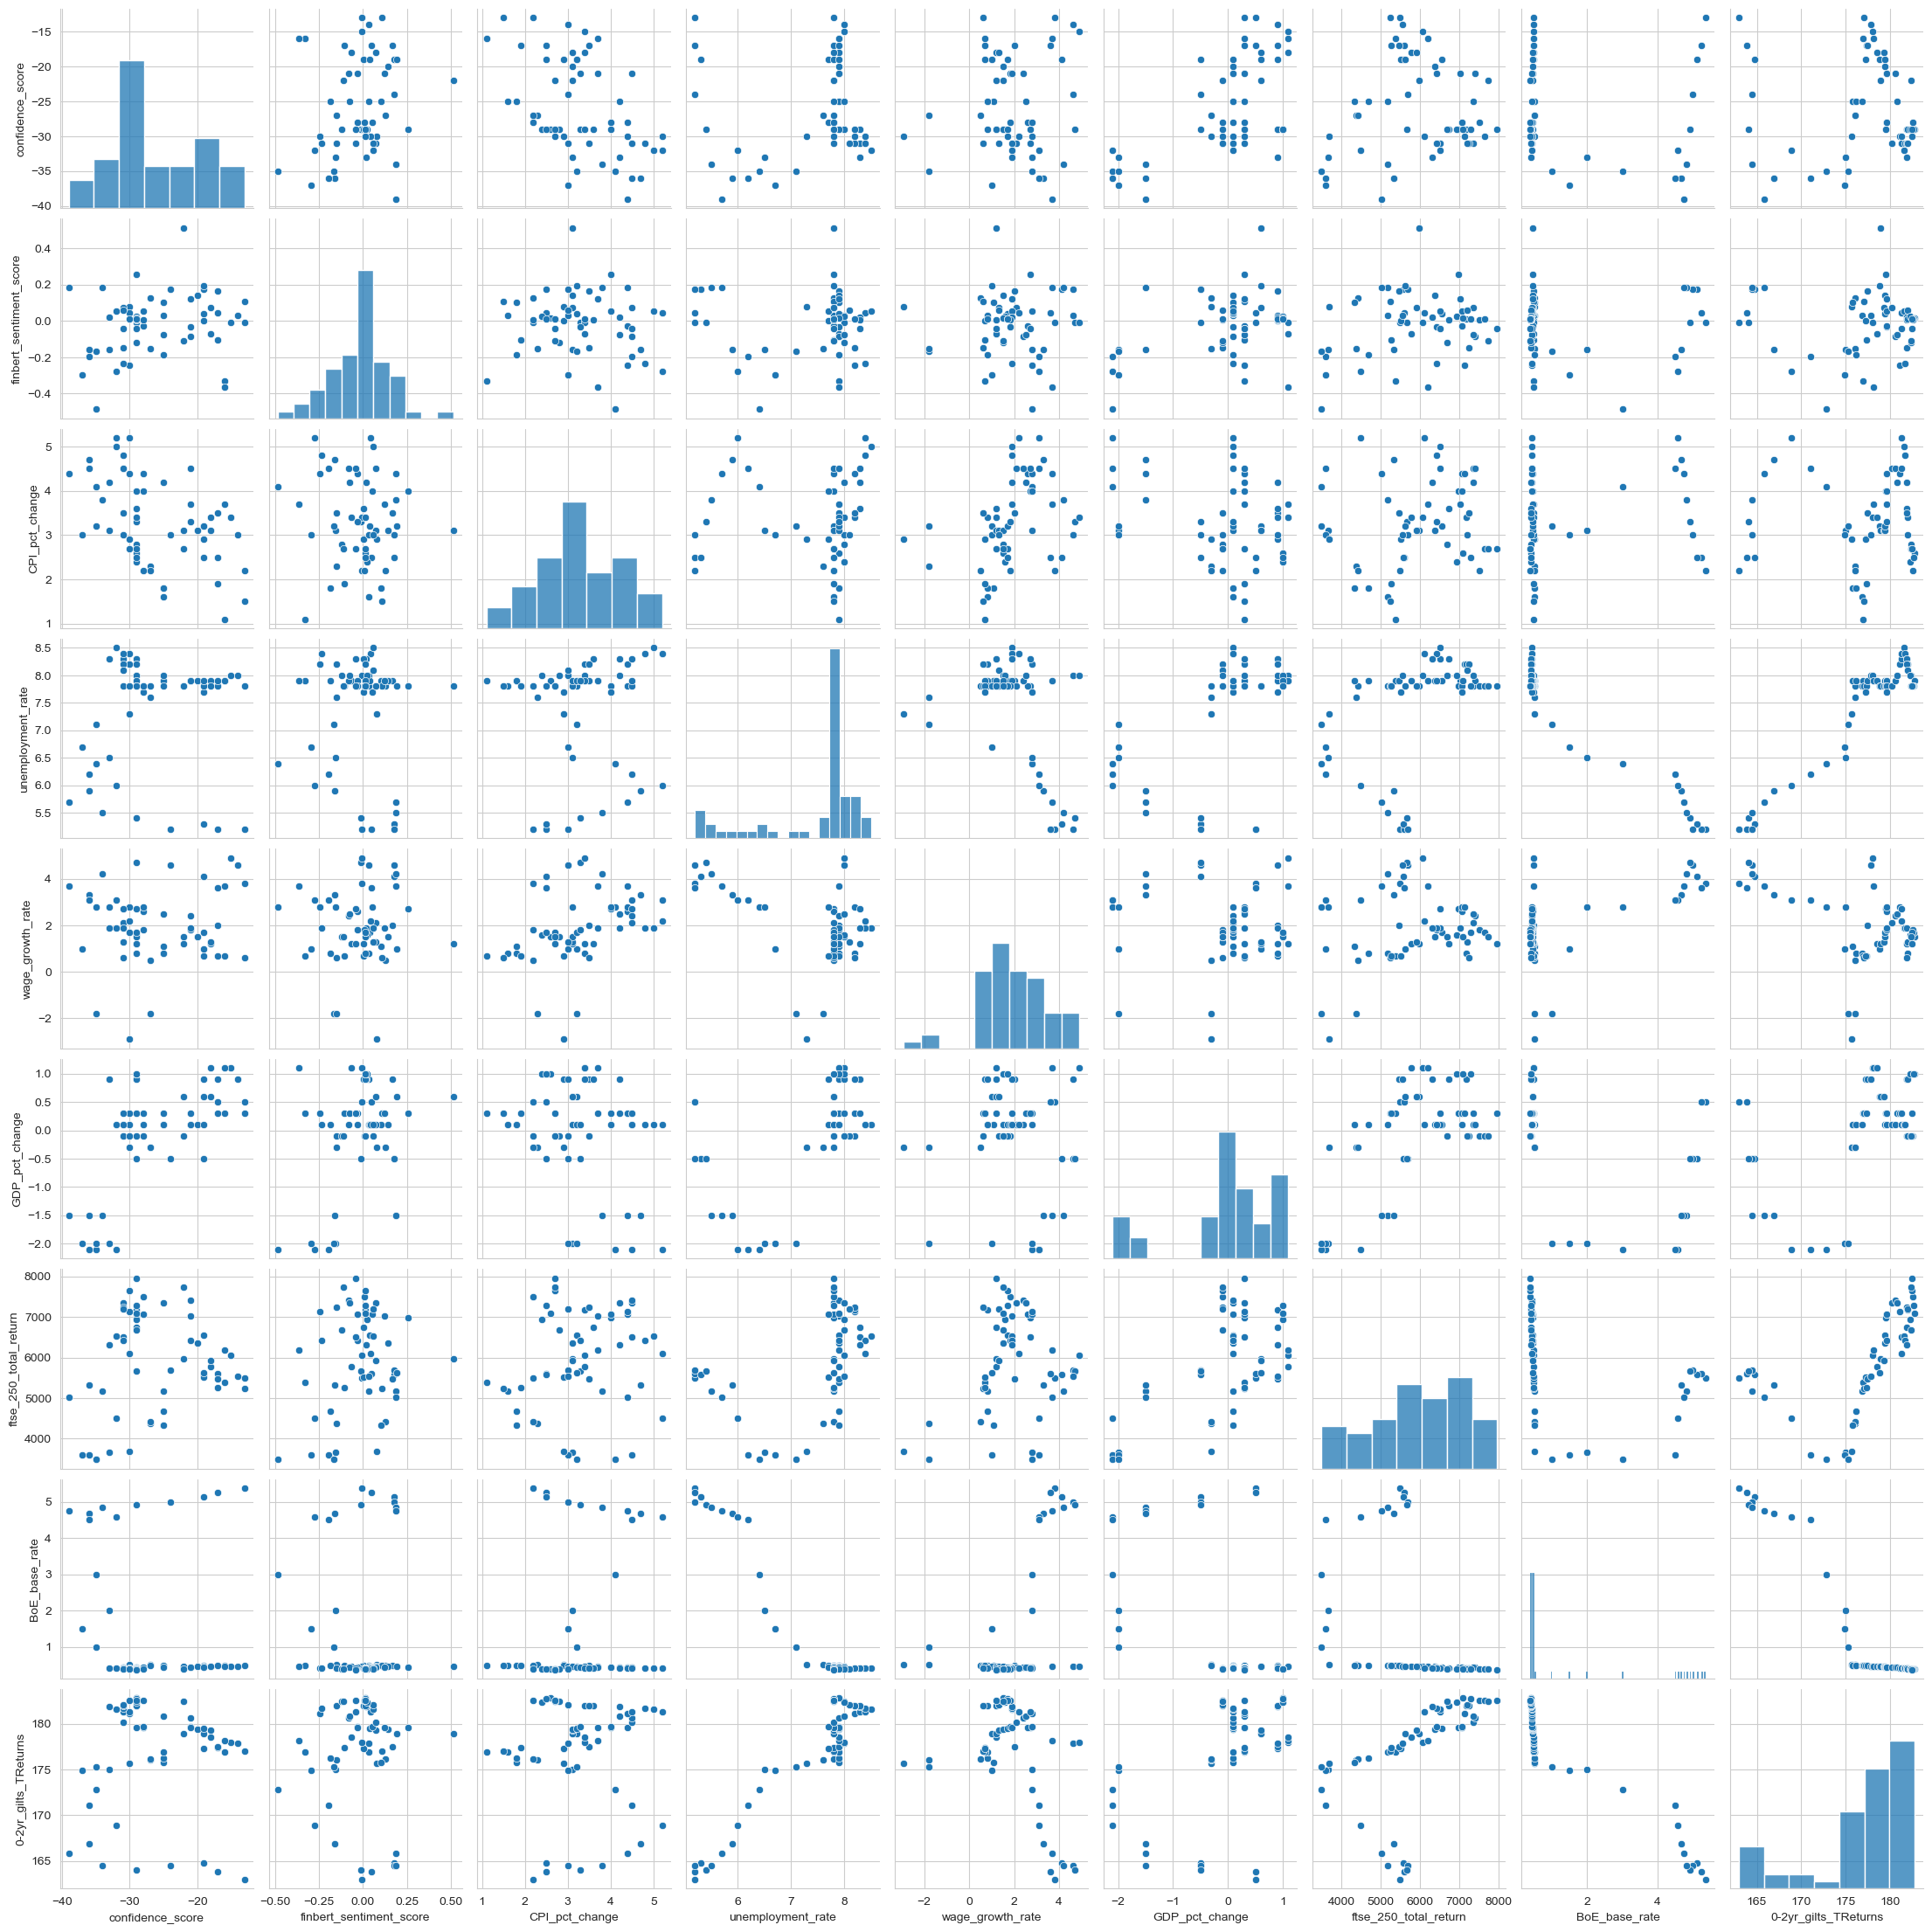

In [29]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

#### Create correlation matrices


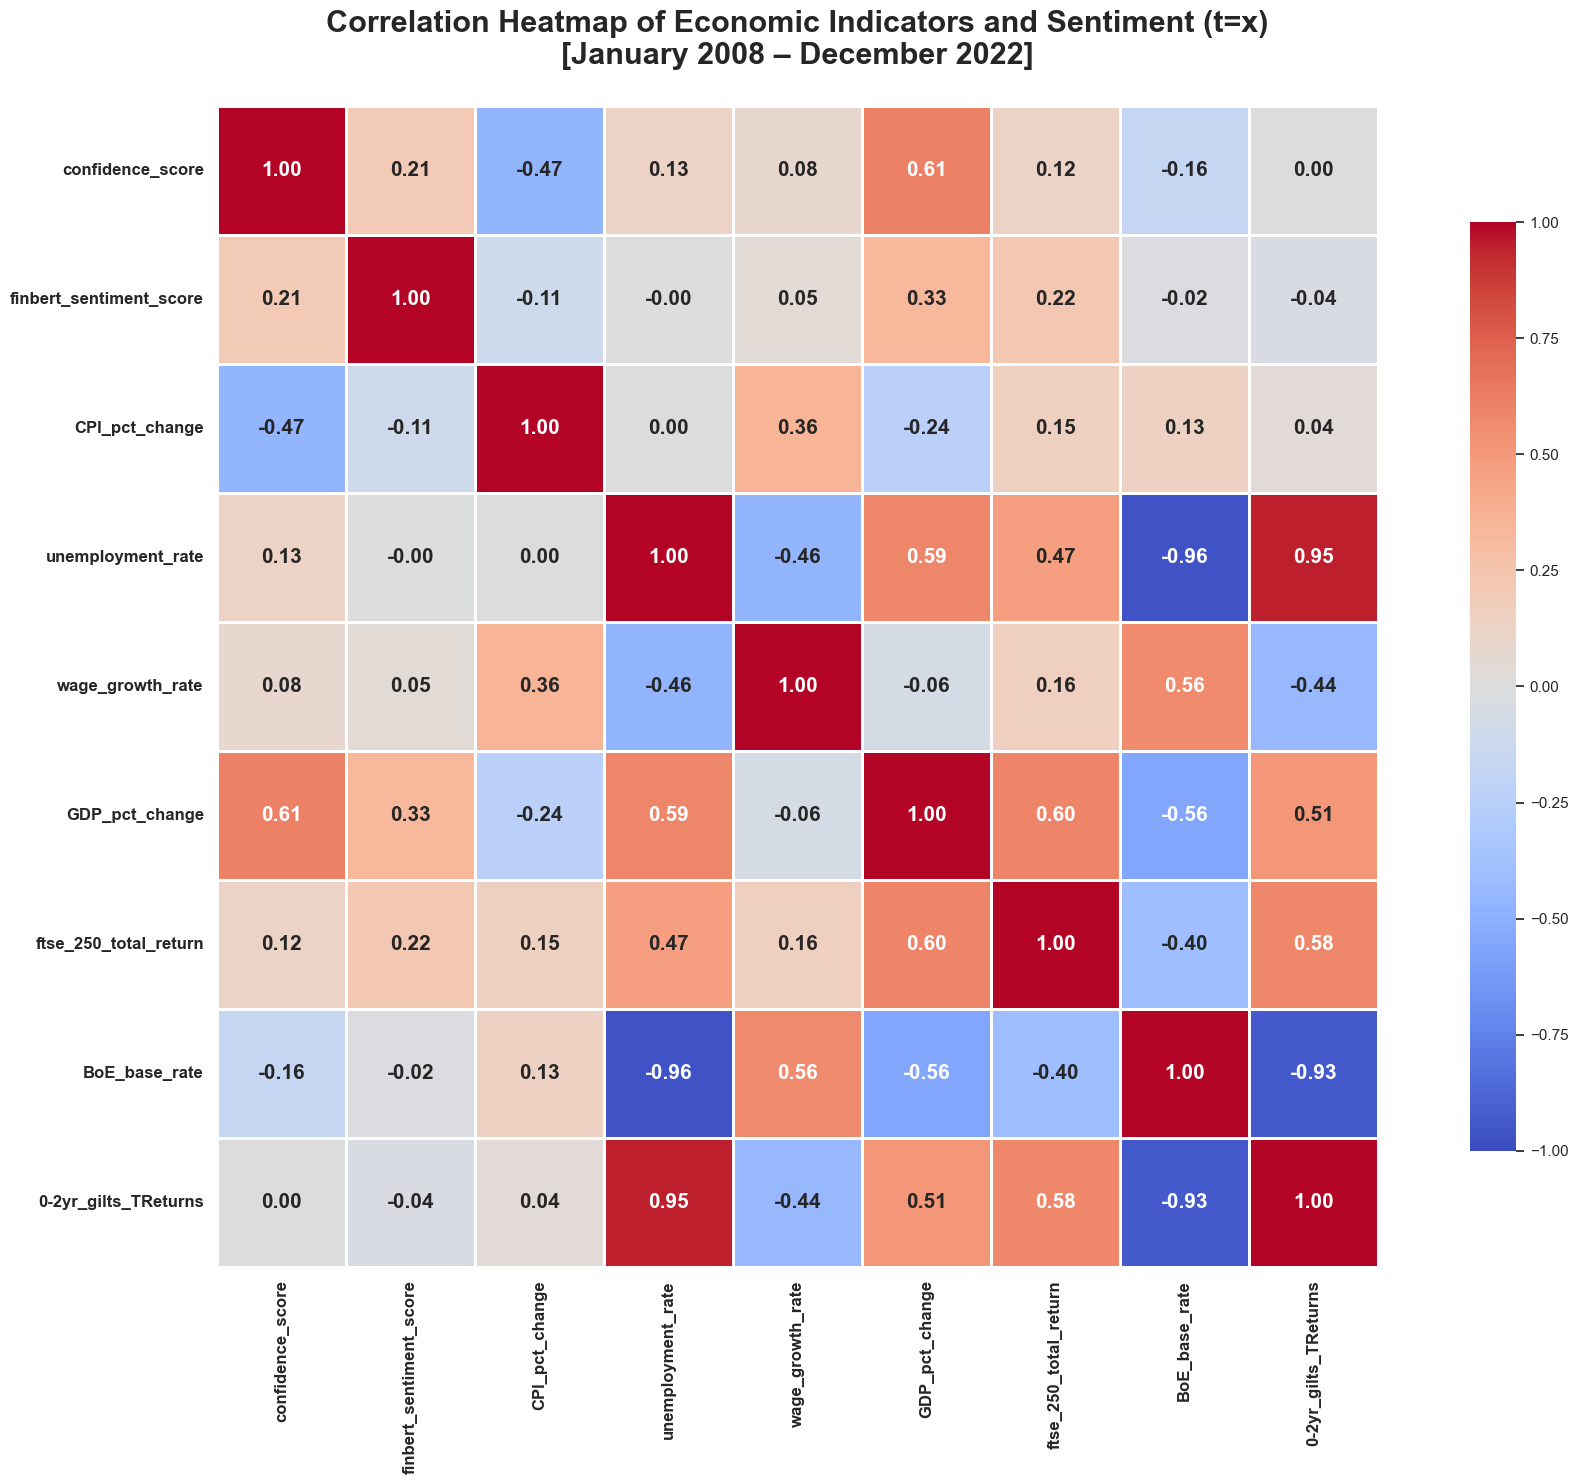

In [43]:
# Ensure 'Date' column is datetime
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'])
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)]
# --- Correlation on numeric columns only ---
numeric_data = filtered_df.select_dtypes(include='number').dropna()
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap of Economic Indicators and Sentiment (t=x)\n[January 2008 – December 2022]', 
          fontsize=22, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

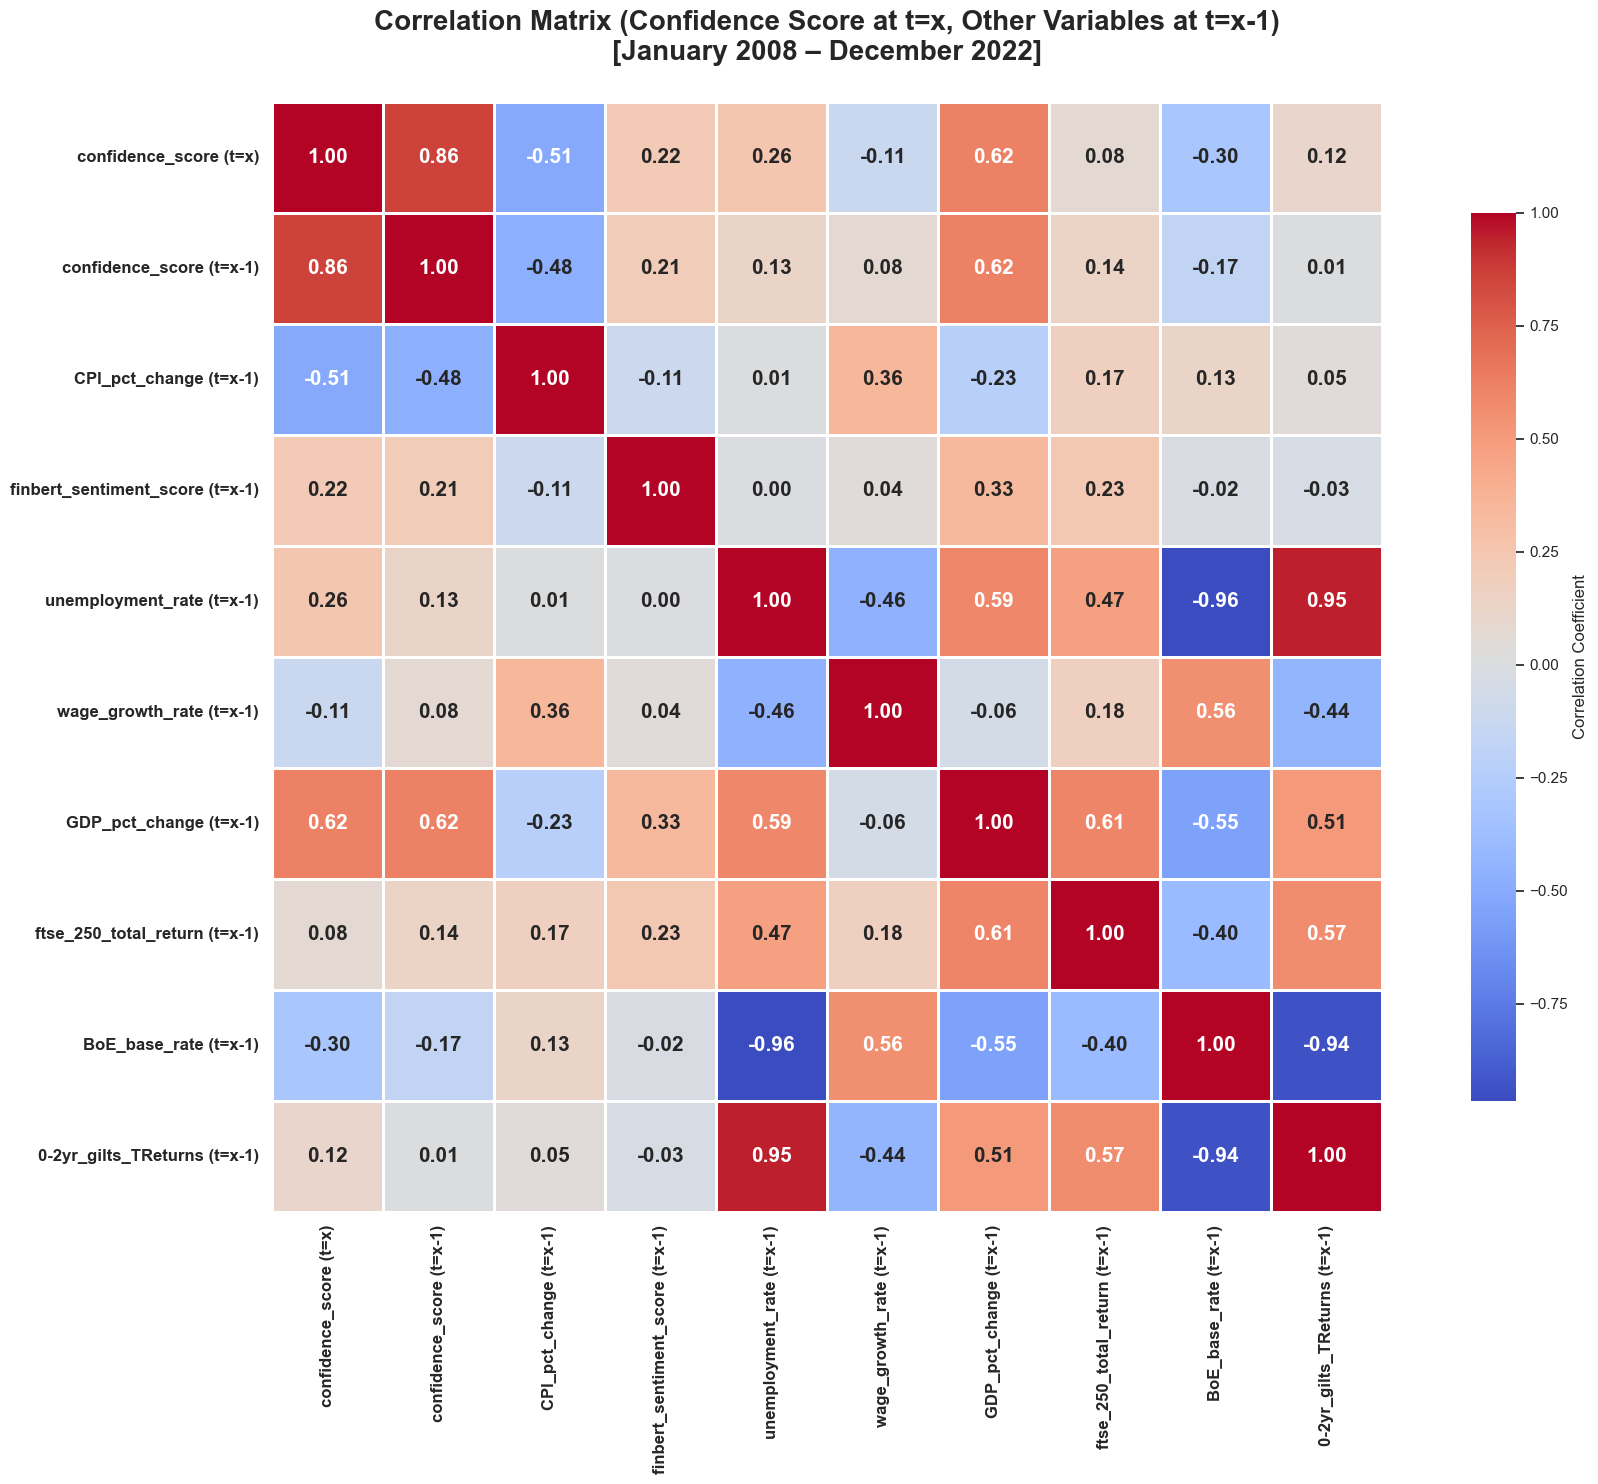

In [63]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()
# Define columns of interest
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-1)\n[January 2008 – December 2022]",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

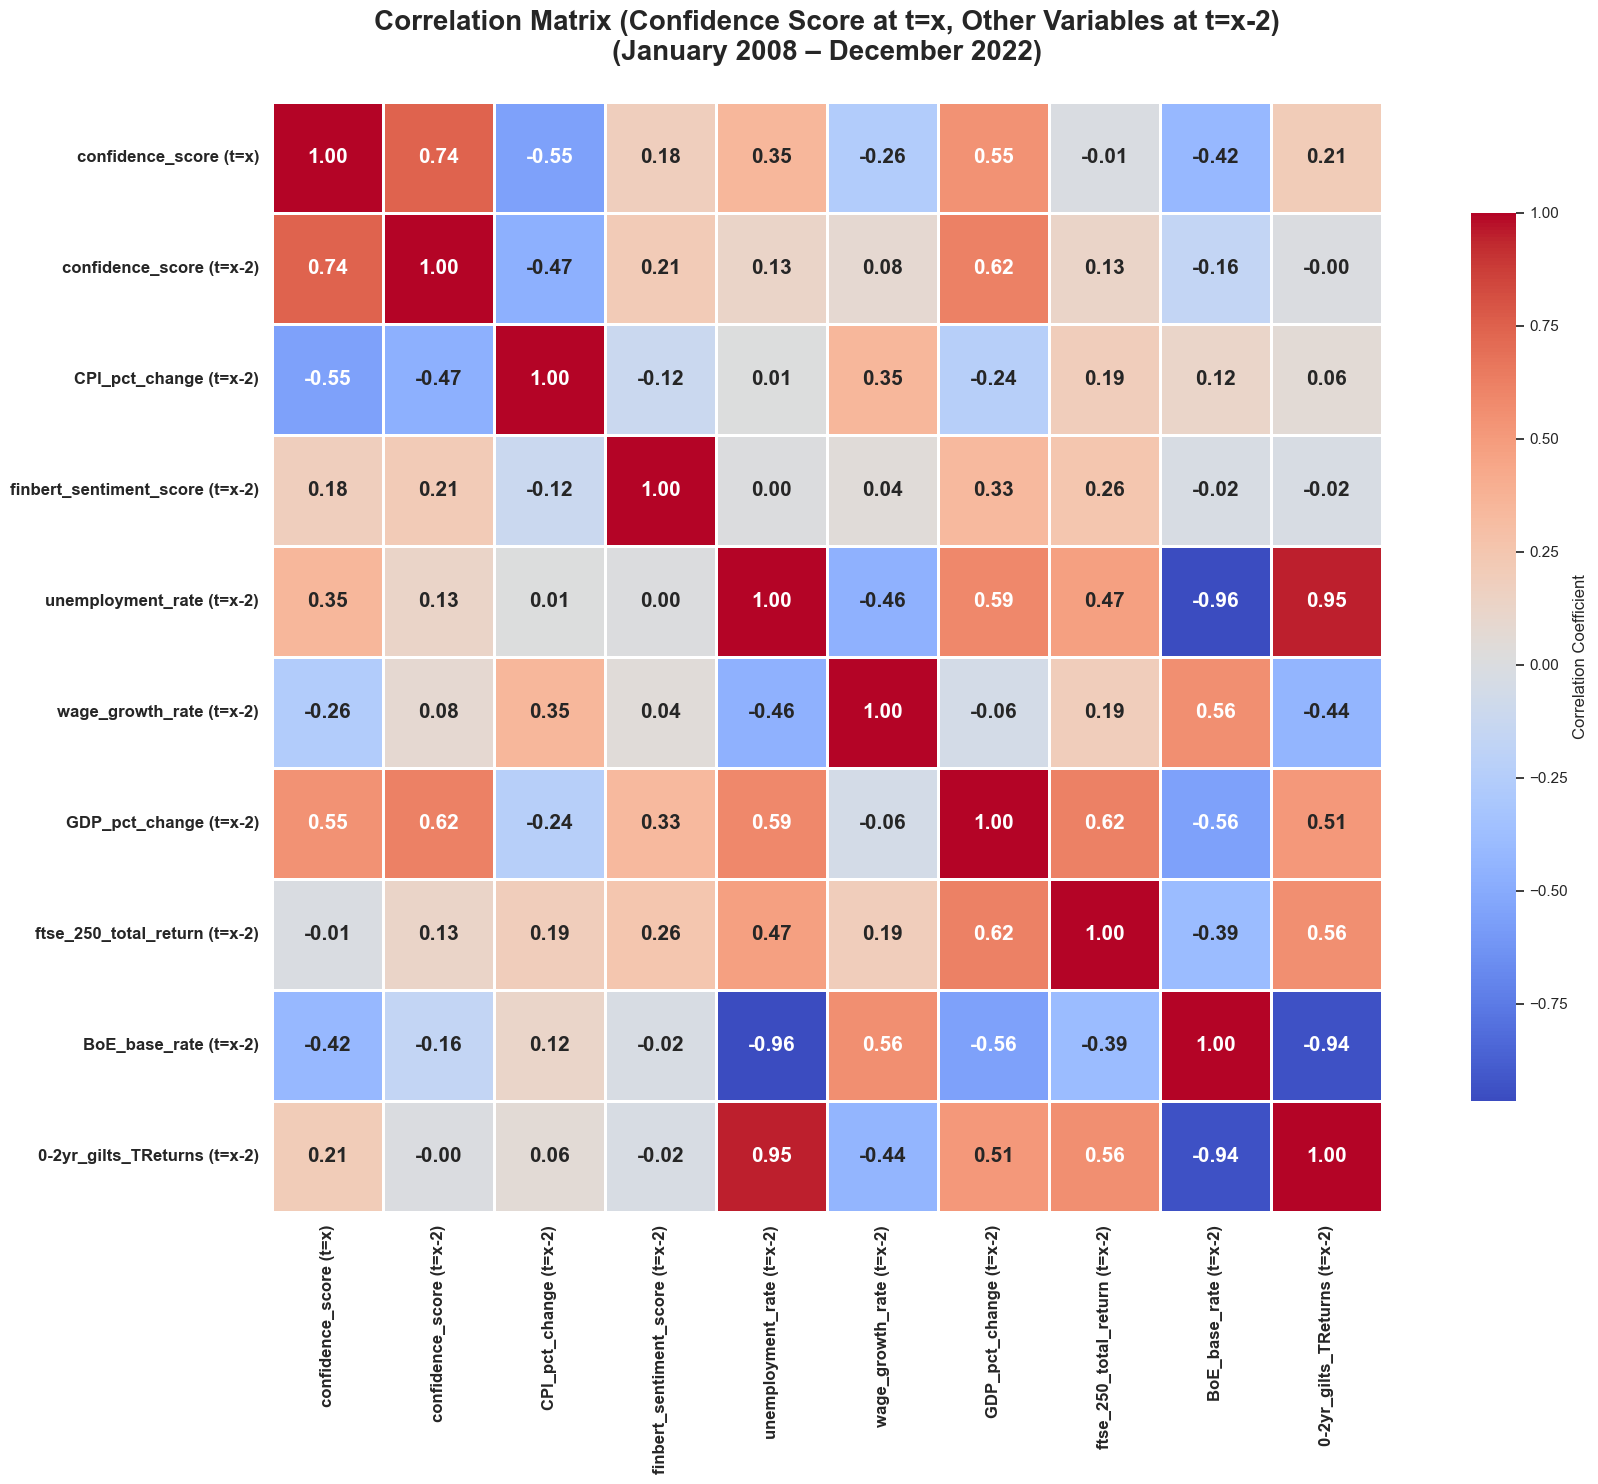

In [67]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest (excluding confidence_score)
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 2-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-2)\n(January 2008 – December 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

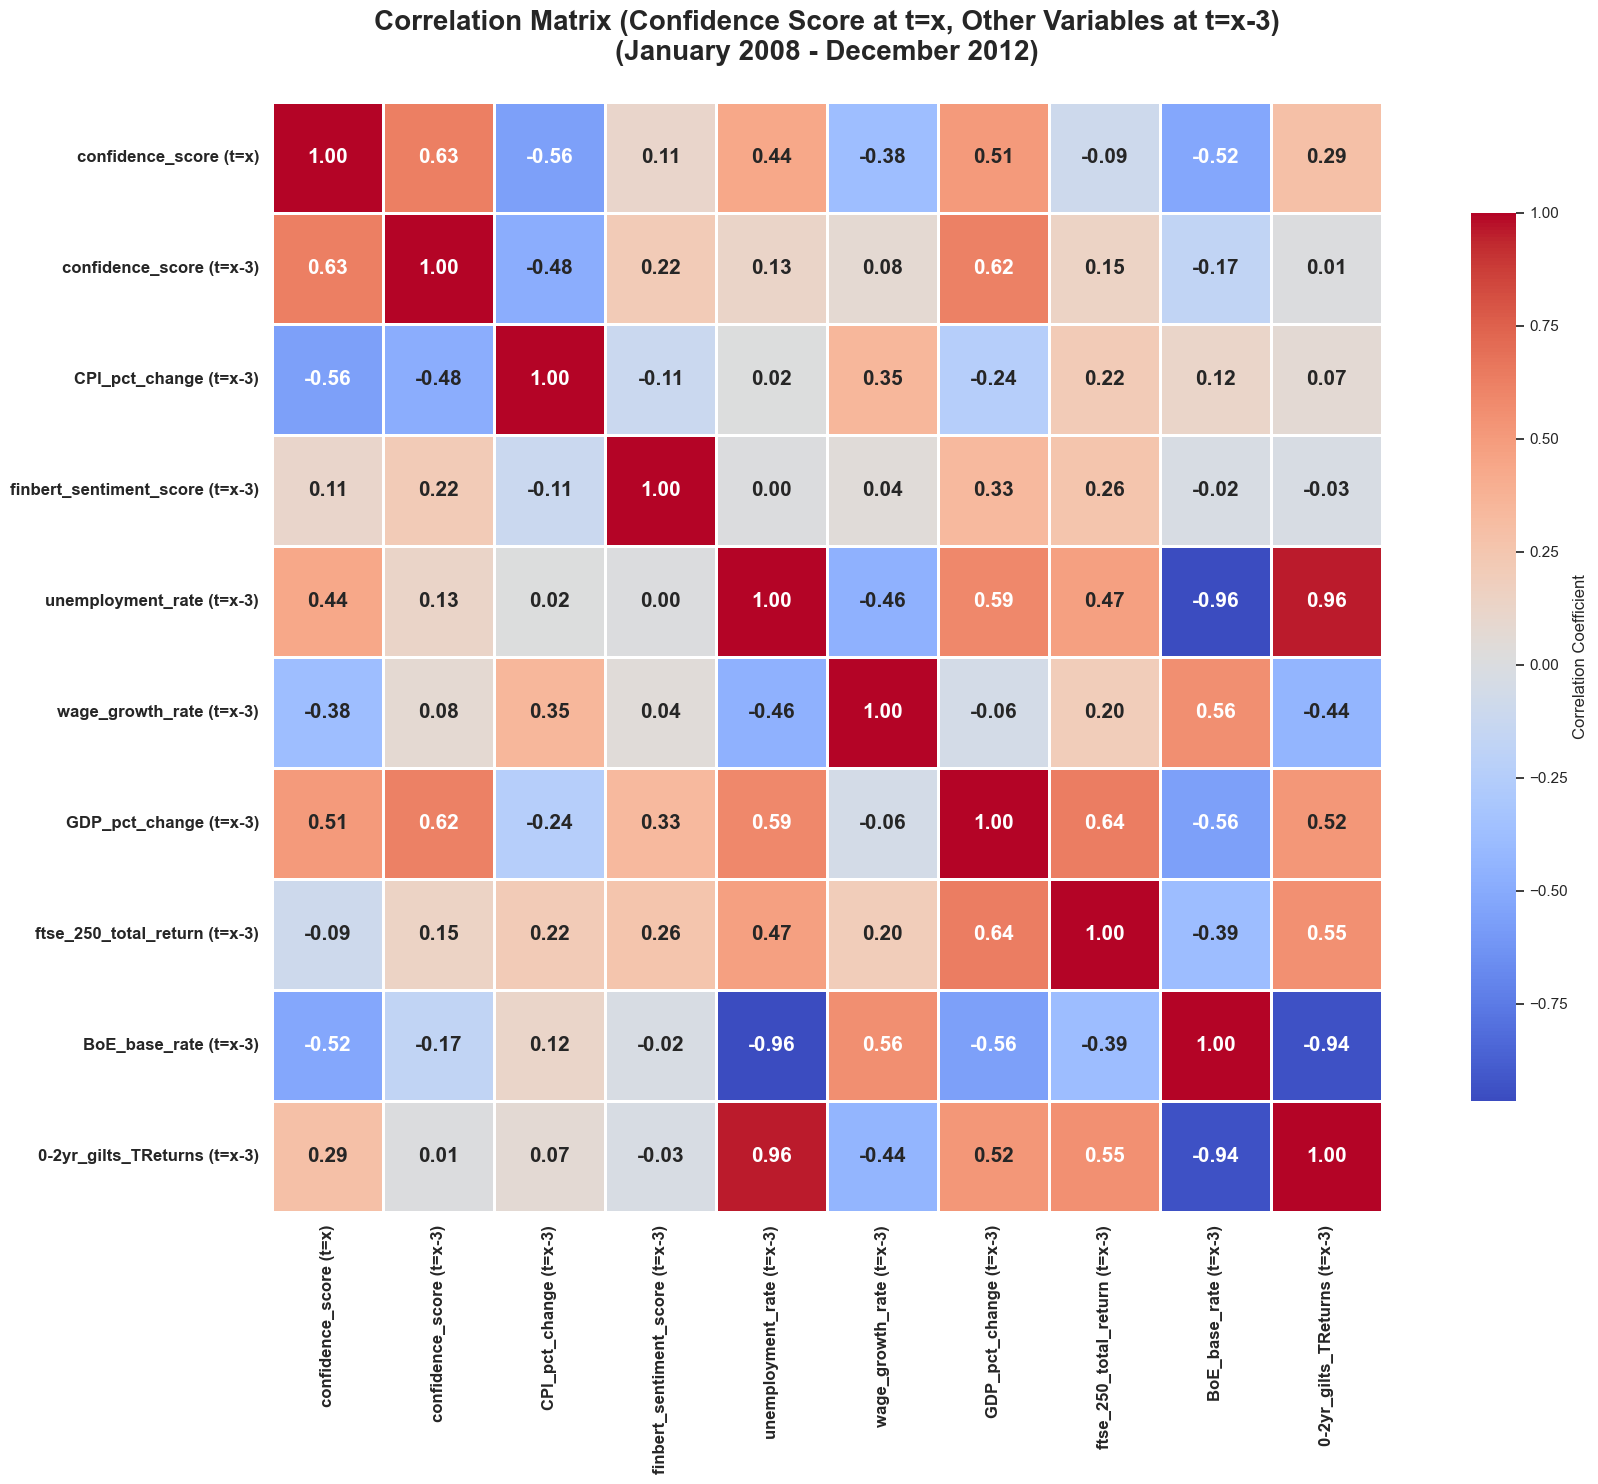

In [69]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter the DataFrame to 01/2008 – 12/2012
start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()
# Define columns of interest (excluding confidence_score)
columns_of_interest = ['confidence_score',
    'CPI_pct_change', 'finbert_sentiment_score',
    'unemployment_rate', 'wage_growth_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['confidence_score']].copy()
correlation_df.rename(columns={'confidence_score': 'confidence_score (t=x)'}, inplace=True)

# Add all other variables with a 3-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Confidence Score at t=x, Other Variables at t=x-3)\n(January 2008 - December 2012)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Based on the correlation heatmaps across multiple time lags, the most influential variables on the consumer confidence score are CPI (% change), unemployment rate, GDP (% change), and the BoE base rate. These variables consistently showed the strongest correlations with the confidence score at specific time lags

### Prepare regression dataframe

In [73]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2008-01-01"
end_date = "2012-12-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()
# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['confidence_score (t=x)'] = filtered_df['confidence_score']
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)
regression_df['BoE_base_rate (t=x-3)'] = filtered_df['BoE_base_rate'].shift(3)
regression_df['unemployment_rate (t=x-3)'] = filtered_df['unemployment_rate'].shift(3)
regression_df['GDP_pct_change (t=x-1)'] = filtered_df['GDP_pct_change'].shift(1)
regression_df['CPI_pct_change (t=x-3)'] = filtered_df['CPI_pct_change'].shift(3)
# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-3),unemployment_rate (t=x-3),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3)
confidence_score (t=x),1.000000,0.847317,-0.523753,0.438244,0.614389,-0.563257
confidence_score (t=x-1),0.847317,1.000000,-0.424694,0.353841,0.619446,-0.559225
BoE_base_rate (t=x-3),-0.523753,-0.424694,1.000000,-0.964581,-0.782572,0.118285
unemployment_rate (t=x-3),0.438244,0.353841,-0.964581,1.000000,0.781131,0.015599
GDP_pct_change (t=x-1),0.614389,0.619446,-0.782572,0.781131,1.000000,-0.251631
CPI_pct_change (t=x-3),-0.563257,-0.559225,0.118285,0.015599,-0.251631,1.000000


In [75]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
     'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: 3.323273297876156
Coefficients:
confidence_score (t=x-1)     0.660001
BoE_base_rate (t=x-3)       -1.428521
unemployment_rate (t=x-3)   -0.981155
GDP_pct_change (t=x-1)      -0.120890
CPI_pct_change (t=x-3)      -0.981065
dtype: float64


In [77]:
# Call the predictions for X (array).
mlr.predict(X)

array([-24.0949428 , -27.51069964, -30.73025247, -34.12321707,
       -37.79472663, -36.28432964, -34.23762029, -37.24912934,
       -37.05873336, -35.14126338, -35.44228824, -31.81081631,
       -28.10019012, -25.99460286, -25.18225363, -23.61230332,
       -23.70641511, -23.40809191, -17.48825261, -15.20990991,
       -17.45348223, -19.13631488, -18.20472716, -17.10366243,
       -18.56869815, -18.83226896, -20.54068326, -21.33243019,
       -23.01409952, -20.07575631, -21.23319325, -20.56918004,
       -21.98328385, -22.10155559, -27.47565343, -27.20406621,
       -27.37207956, -29.74049437, -22.64593513, -25.89475038,
       -29.2888557 , -29.7486395 , -29.45289233, -30.96510264,
       -31.08595041, -32.40055301, -29.4622098 , -28.77144262,
       -29.3779022 , -29.07956101, -27.8536538 , -27.39397183,
       -27.09563064, -26.69919195, -26.00029753, -27.12006385,
       -21.54172762])

In [79]:
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_).

R-squared:  0.7712695979359566
Intercept:  3.323273297876156
Coefficients:


[('confidence_score (t=x-1)', 0.6600005050435607),
 ('BoE_base_rate (t=x-3)', -1.4285214383111096),
 ('unemployment_rate (t=x-3)', -0.9811549415106445),
 ('GDP_pct_change (t=x-1)', -0.12088974022662427),
 ('CPI_pct_change (t=x-3)', -0.9810649741217953)]

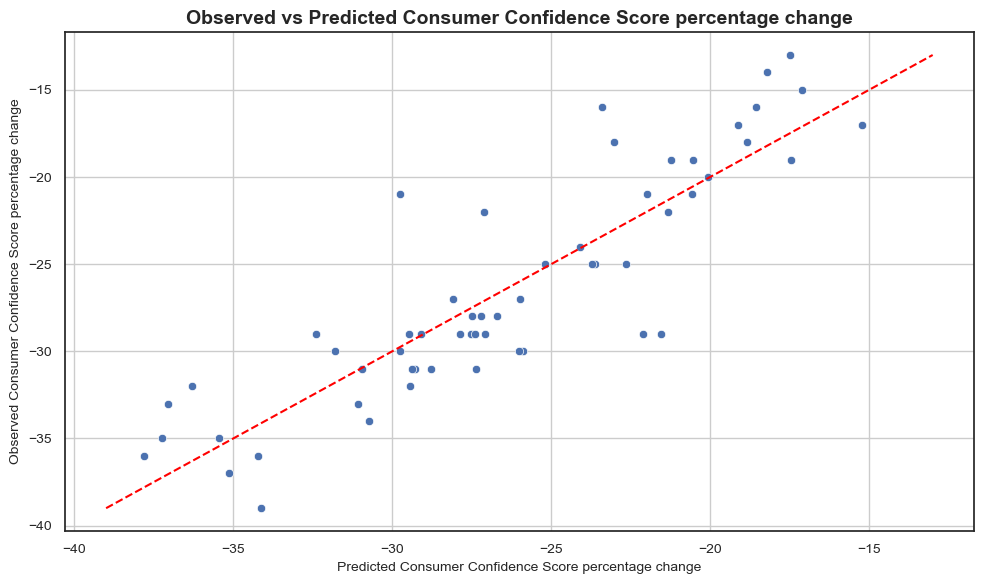

In [83]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()


#### The scatter plot for the 2008–2012 time frame shows a strong positive alignment between the predicted and observed consumer confidence scores. Most data points are clustered closely around the red dashed line (the ideal fit), indicating that the model performed well in capturing the pattern of confidence score changes during this period, despite some moderate deviations at the extremes.

### Training and testing subsets with MLR

In [90]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [92]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.779
Model:                                OLS   Adj. R-squared:                  0.751
Method:                     Least Squares   F-statistic:                     27.56
Date:                    Sat, 17 May 2025   Prob (F-statistic):           7.90e-12
Time:                            21:47:03   Log-Likelihood:                -115.55
No. Observations:                      45   AIC:                             243.1
Df Residuals:                          39   BIC:                             253.9
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

#### This OLS regression model for the 2008–2012 period explains 77.9% of the variation in the consumer confidence score (R² = 0.779). The confidence score at lag one month (t=x-1) is the only statistically significant predictor (p < 0.001), showing a strong positive effect. Other variables—including BoE base rate, unemployment rate, GDP change, and CPI change—have no statistically significant impact (p > 0.05). While the overall model is statistically significant (p < 0.001), the individual predictors beyond confidence_score (t=x-1) may not meaningfully contribute during this timeframe.

In [95]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [97]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [-31.46563564 -20.48583379 -37.03866948 -23.74902773 -34.07648993
 -37.90344092 -29.56336276 -15.065426   -27.58179026 -29.92539691
 -30.02865692 -27.16144756 -23.7959983  -35.17726873 -23.97299042
 -18.35160579 -22.15083005 -26.37746613 -27.5203372  -18.73775001
 -32.0127884  -22.04389667 -28.29585666 -29.60893225 -19.96996253
 -30.1268589  -27.05136751 -19.22840536 -30.49394065 -31.51832562
 -25.93870725 -27.47731835 -16.83265586 -29.84745733 -35.65233219
 -18.18135764 -17.47823928 -21.68676651 -17.54791884 -37.28332441
 -29.8486528  -25.28013833 -23.08155868 -27.83680186 -22.5470116 ]


In [99]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train))  

Prediction for test set: [-23.47769344 -36.26122025 -21.21855846 -26.02138502 -27.82558319
 -27.54724318 -21.25542374 -20.51558978 -32.95905348 -28.14574666
 -29.17628883 -33.99782358]


In [101]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

70.9299648312238


### Check for multicollinearity

In [104]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))


   VIF Factor                   features
0      1582.5                      const
1         2.5   confidence_score (t=x-1)
2        20.0      BoE_base_rate (t=x-3)
3        20.9  unemployment_rate (t=x-3)
4         4.1     GDP_pct_change (t=x-1)
5         1.9     CPI_pct_change (t=x-3)


#### The VIF results indicate potential multicollinearity issues, especially with the constant term (1582.5) and variables like the BoE base rate (20.0) and unemployment rate (20.9), which exceed the common threshold of 10. This suggests these predictors may be highly correlated with others in the model and could distort coefficient estimates. CPI and confidence score have acceptable VIFs, indicating low multicollinearity.

### Check for heteroscedasticity

In [108]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [110]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 1.7163147014876352, 'LM Test p-value': 0.8868380080314598, 'F-stat': 0.3092910083620739, 'F-test p-value': 0.9043895780637856}


#### The LM test results show high p-values (both above 0.88), indicating no significant evidence of autocorrelation in the model’s residuals. This suggests the regression assumptions regarding error independence are likely satisfied.










### Check normality of regression residuals - assumption of MLR

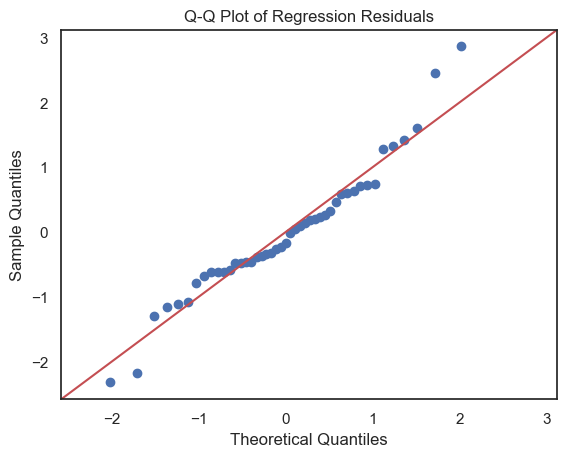

In [118]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot shows that most residuals lie along the diagonal line, suggesting that the residuals are approximately normally distributed. However, slight deviations at the tails indicate mild non-normality, which is common in small samples.

### Evaluate the model

In [122]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 2.2385028696236877
Mean Square Error (Final): 8.436366456271946


#### The model's performance is solid, with a Mean Absolute Error (MAE) of 2.24 and a Mean Squared Error (MSE) of 8.44, indicating relatively low average prediction error and good overall accuracy.

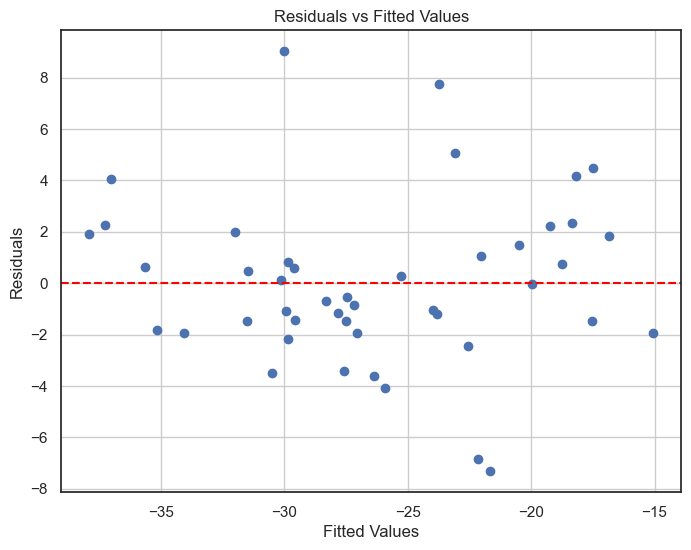

In [125]:
plt.figure(figsize=(8, 6))
plt.scatter(model1.fittedvalues, model1.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

#### The residuals vs. fitted values plot shows a fairly random scatter around the horizontal line at zero, which suggests that the model's errors are generally unbiased and the linear regression assumptions are reasonably met. However, a slight pattern at the edges may hint at some non-linearity or heteroscedasticity.

#### Drop Base_rate, GDP and Unemployment and Re perform MLR 

In [135]:
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    ['confidence_score (t=x-1)','CPI_pct_change (t=x-3)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [137]:
# Call the predictions for X (array).
mlr.predict(X)

array([-19.91080281, -24.00449622, -27.83932159, -32.10559368,
       -36.19928709, -34.32983859, -31.77971437, -35.1064427 ,
       -34.77092435, -32.63296878, -35.3556717 , -32.9588481 ,
       -29.03773339, -26.90941685, -26.65054882, -24.5988826 ,
       -24.51259325, -24.16743587, -17.2647502 , -14.79127629,
       -17.42768986, -19.30677739, -18.11800462, -16.68000285,
       -17.96470399, -18.30022234, -20.17930987, -21.20514298,
       -23.24717017, -20.00673118, -21.45437199, -20.68740691,
       -22.22133706, -22.30762641, -28.52963635, -28.10782865,
       -28.36669669, -31.01274929, -22.99794117, -26.49724819,
       -30.33207356, -30.8401706 , -30.24578422, -31.86600371,
       -31.70306405, -33.06441551, -29.82397652, -29.30624045,
       -30.32243453, -30.14985584, -28.70221504, -28.27076831,
       -28.09818962, -27.75303224, -27.15864586, -28.60628666,
       -22.21169803])

In [139]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

# The zip() function in the list(zip(X, multi.coef_)) line is used to pair corresponding elements from two iterable objects (in this case, X and multi.coef_)

R-squared:  0.7295788902539769
Intercept:  -3.4401008039128023
Coefficients:


[('confidence_score (t=x-1)', 0.7669650744647101),
 ('CPI_pct_change (t=x-3)', -0.8628934495967945)]

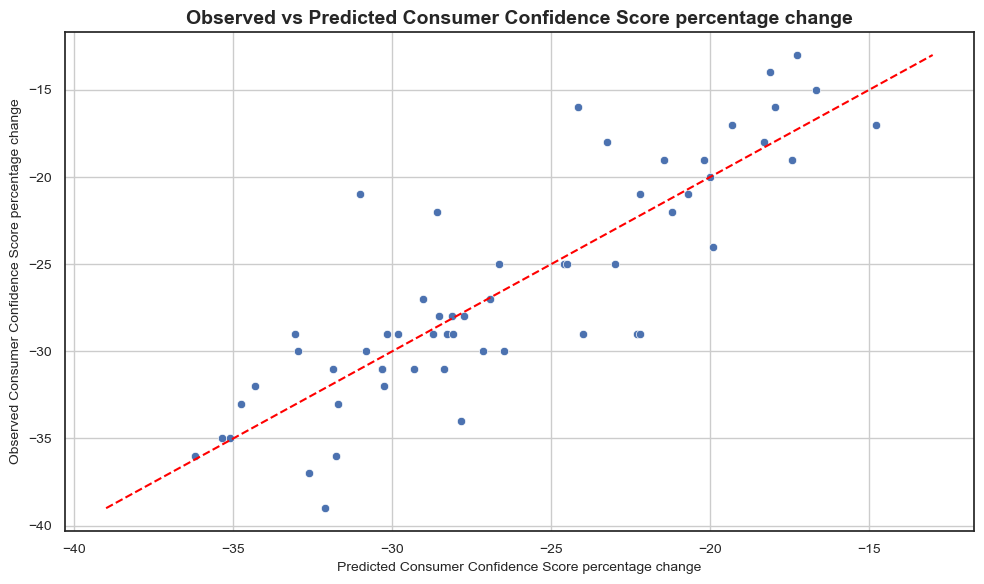

In [141]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['confidence_score (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Consumer Confidence Score percentage change', fontsize=10)
plt.ylabel('Observed Consumer Confidence Score percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Consumer Confidence Score percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [144]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [146]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  
                           

                              OLS Regression Results                              
Dep. Variable:     confidence_score (t=x)   R-squared:                       0.755
Model:                                OLS   Adj. R-squared:                  0.743
Method:                     Least Squares   F-statistic:                     64.62
Date:                    Sat, 17 May 2025   Prob (F-statistic):           1.52e-13
Time:                            22:04:06   Log-Likelihood:                -117.94
No. Observations:                      45   AIC:                             241.9
Df Residuals:                          42   BIC:                             247.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#### The updated multiple linear regression (MLR) model, after removing high VIF variables to reduce multicollinearity, shows a good fit with an R-squared of 0.755. The confidence score at t=x-1 is a significant predictor (p < 0.001), while CPI change at t=x-3 is not statistically significant (p = 0.142). This suggests that past confidence scores have a stronger and more reliable influence on the current confidence score than CPI changes, under this model.

In [149]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0        17.6                     const
1         1.5  confidence_score (t=x-1)
2         1.5    CPI_pct_change (t=x-3)


#### No multicollinearity observed from the VIF output

In [152]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [154]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 1.7163147014876352, 'LM Test p-value': 0.8868380080314598, 'F-stat': 0.3092910083620739, 'F-test p-value': 0.9043895780637856}


#### The Breusch-Pagan test results indicate no evidence of heteroskedasticity, as both the LM Test p-value (0.887) and F-test p-value (0.904) are well above 0.05. This suggests that the variance of the residuals is constant and the model satisfies the homoskedasticity assumption.

In [157]:
regression_df.describe()

,Date,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-3),unemployment_rate (t=x-3),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3)
count,57,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2010-08-01 06:44:12.631578880,-26.456140,-26.280702,1.323921,7.436842,-0.042105,3.314035
min,2008-04-01 00:00:00,-39.000000,-39.000000,0.382022,5.200000,-2.100000,1.100000
25%,2009-06-01 00:00:00,-31.000000,-31.000000,0.421348,7.300000,-0.300000,2.600000
50%,2010-08-01 00:00:00,-29.000000,-28.000000,0.460674,7.800000,0.100000,3.200000
75%,2011-10-01 00:00:00,-21.000000,-21.000000,0.500000,8.000000,0.600000,4.100000
max,2012-12-01 00:00:00,-13.000000,-13.000000,5.375000,8.500000,1.100000,5.200000
std,NaN,6.519395,6.583948,1.719678,0.967255,0.910837,0.982969


In [159]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 221 to 277
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       57 non-null     datetime64[ns]
 1   confidence_score (t=x)     57 non-null     float64       
 2   confidence_score (t=x-1)   57 non-null     float64       
 3   BoE_base_rate (t=x-3)      57 non-null     float64       
 4   unemployment_rate (t=x-3)  57 non-null     float64       
 5   GDP_pct_change (t=x-1)     57 non-null     float64       
 6   CPI_pct_change (t=x-3)     57 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 3.6 KB


In [161]:
regression_df.head()

,Date,confidence_score (t=x),confidence_score (t=x-1),BoE_base_rate (t=x-3),unemployment_rate (t=x-3),GDP_pct_change (t=x-1),CPI_pct_change (t=x-3)
221,2008-04-01,-24.0,-19.0,5.375000,5.2,-0.5,2.2
222,2008-05-01,-29.0,-24.0,5.250000,5.2,-0.5,2.5
223,2008-06-01,-34.0,-29.0,5.125000,5.3,-0.5,2.5
224,2008-07-01,-39.0,-34.0,5.000000,5.2,-1.5,3.0
225,2008-08-01,-36.0,-39.0,4.916667,5.4,-1.5,3.3


Root Mean Squared Error: 3.1598
Mean Squared Error: 9.9845
Mean Absolute Error: 2.2993
R² Score: 0.7591


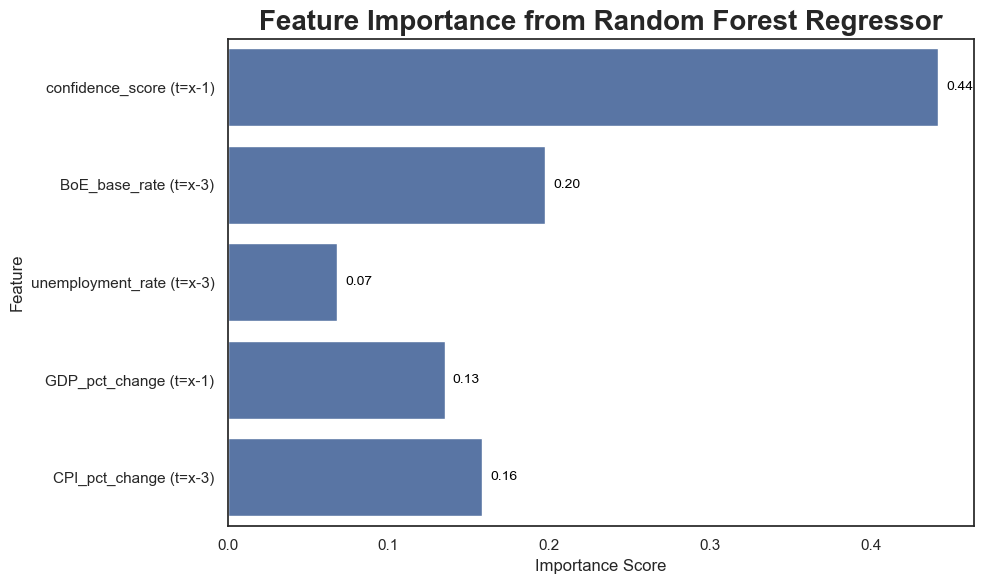

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['confidence_score (t=x)',
     'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
     'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
])
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
    ]
]

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Root Mean Squared Error: 3.4181
Mean Squared Error: 11.6837
Mean Absolute Error: 2.8181
R² Score: 0.7181


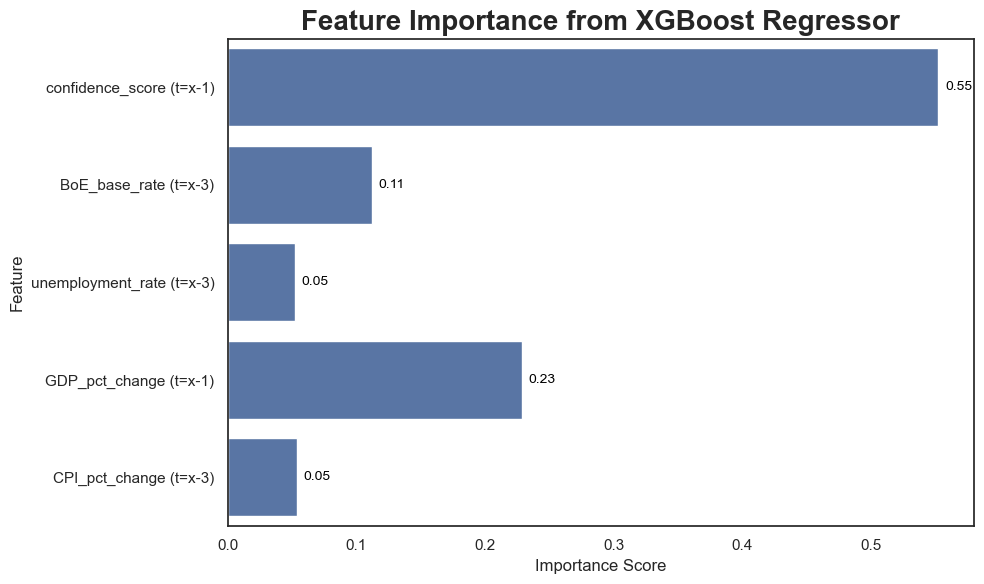

In [167]:
from xgboost import XGBRegressor

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['confidence_score (t=x)',
     'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
     'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
])
# Define dependent variable
y = regression_df['confidence_score (t=x)']

# Define independent variables
X = regression_df[
    [
'confidence_score (t=x-1)','BoE_base_rate (t=x-3)', 'unemployment_rate (t=x-3)',
'GDP_pct_change (t=x-1)','CPI_pct_change (t=x-3)'
    ]
]
y = regression_df['confidence_score (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

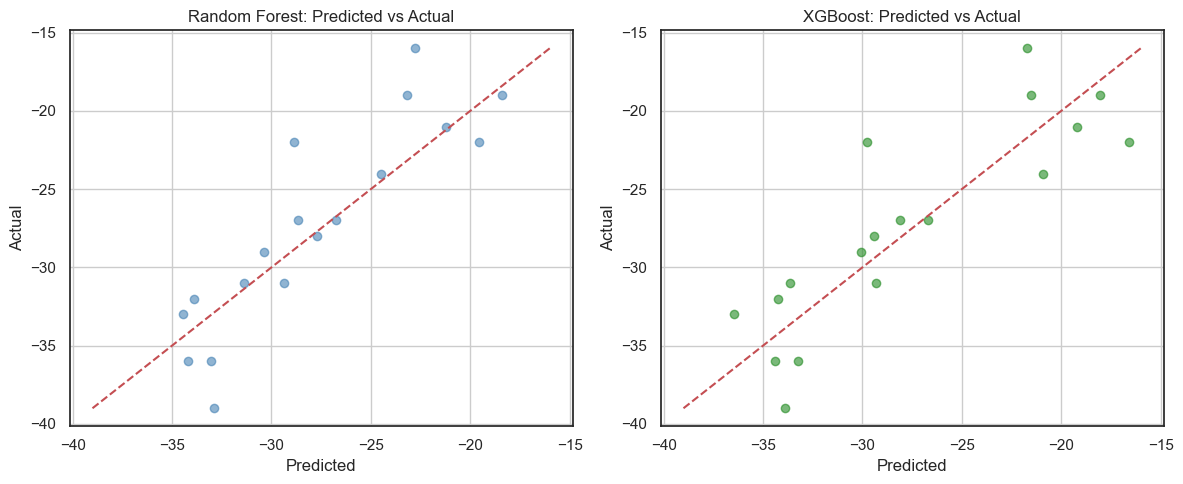

In [169]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()


#### The comparison between the Random Forest and XGBoost models highlights that both are effective in predicting changes in consumer confidence scores, though Random Forest demonstrates slightly stronger overall performance. It achieved a higher R² score (0.7591 vs. 0.7181), along with lower mean absolute error (2.30 vs. 2.82) and mean squared error (9.98 vs. 11.68), suggesting more accurate predictions. In terms of feature importance, both models identified the lagged confidence score (t=x-1) as the most influential predictor, though XGBoost gave it even more weight (0.55 vs. 0.44). Interestingly, GDP percentage change (t=x-1) was more prominent in XGBoost, while Random Forest assigned greater importance to the Bank of England base rate (t=x-3) and CPI percentage change (t=x-3). Overall, Random Forest provided more balanced feature contributions, whereas XGBoost concentrated more heavily on past confidence scores and GDP growth.